# Fake news detector by Group 2 - Iron Hack AI Engineering

## Import the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
## Read Data for the Fraudulent Email Kaggle Challenge
data = pd.read_csv("training_data_lowercase.csv", header=None, names=['label', 'title'] ,sep="	")

data.head()

,label,title
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


In [3]:
from sklearn.model_selection import train_test_split

X = data["title"]  # Features (input)
y = data["label"]  # Labels (output)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.head(),"\n \n ")
print(y.head())

0    donald trump sends out embarrassing new year‚s...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke becomes an internet joke ...
3    trump is so obsessed he even has obama‚s name ...
4    pope francis just called out donald trump duri...
Name: title, dtype: object 
 
 
0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64


In [4]:
print(X)

0        donald trump sends out embarrassing new year‚s...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes an internet joke ...
3        trump is so obsessed he even has obama‚s name ...
4        pope francis just called out donald trump duri...
                               ...                        
34147    tears in rain as thais gather for late king's ...
34148    pyongyang university needs non-u.s. teachers a...
34149    philippine president duterte to visit japan ah...
34150    japan's abe may have won election\tbut many do...
34151    demoralized and divided: inside catalonia's po...
Name: title, Length: 34152, dtype: object


### Clean titles

In [5]:
# Clean artefacts

import re

def clean_artefacts(X):

    cleaned_text =[]

    for sentence in X:

        # Turn into strings
        sentence = str(sentence)

        # Remove JS/CSS
        sentence = re.sub(r'<script\b[^<]*(?:(?!<\/script>)<[^<]*)*<\/script>|<style\b[^<]*(?:(?!<\/style>)<[^<]*)*<\/style>', '', sentence)

        # Remove HTML comments
        sentence = re.sub(r'<!--.*?-->', '', sentence)

        # Remove HTML tags
        sentence = re.sub(r'<[^>]+>', '', sentence)

        # Turn into a string
        sentence = str(sentence)

        # Remove all special characters
        sentence = re.sub(r'[^a-zA-Z\s]', ' ', sentence)  # Keep only letters and spaces
        
        # Remove numbers
        sentence = re.sub(r'\d+', ' ', sentence)
        
        # Remove all single characters
        sentence = re.sub(r'\b[a-zA-Z]\b', ' ', sentence)  # Remove isolated single letters
        
        # Remove single characters from the start
        sentence = re.sub(r'^[a-zA-Z]\s+', ' ', sentence)

        # Remove prefixed 'b' (commonly from bytes conversion)
        sentence = re.sub(r'\bb\s+', ' ', sentence)
        
        # Substitute multiple spaces with a single space
        sentence = re.sub(r'\s+', ' ', sentence).strip()
        
        # Convert to lowercase
        sentence = sentence.lower()
        
        # Append the cleaned sentence to the list
        cleaned_text.append(sentence)
    

    return cleaned_text

X_clean=clean_artefacts(X)

X_clean

['donald trump sends out embarrassing new year eve message this is disturbing',
 'drunk bragging trump staffer started russian collusion investigation',
 'sheriff david clarke becomes an internet joke for threatening to poke people in the eye',
 'trump is so obsessed he even has obama name coded into his website images',
 'pope francis just called out donald trump during his christmas speech',
 'racist alabama cops brutalize black boy while he is in handcuffs graphic images',
 'fresh off the golf course',
 'trump said some insanely racist stuff inside the oval office',
 'former cia director slams trump over un bullying',
 'brand new pro trump ad features so much kissing it will make you sick',
 'papa john founder retires',
 'paul ryan just told us he doesn care about struggling families living in blue states',
 'bad news for trump mitch mcconnell says no to repealing obamacare in',
 'lindsey graham trashes media for portraying trump as kooky forgets his own words',
 'heiress to disney 

### Remove stopwords _(deactivated for this model)_

In [6]:
# import string
# from nltk.corpus import stopwords
# print(string.punctuation)
# print(stopwords.words("english")[100:110])
# from nltk.stem.snowball import SnowballStemmer
# snowball = SnowballStemmer('english')


# print(type(X_clean))  # Should be a list of strings
# print(type(stopwords))  # Should be a list or set

In [7]:
# from nltk.corpus import stopwords
# stopwords = set(stopwords.words("english"))


# from nltk.tokenize import word_tokenize

# def remove_stopwords(text, stopwords):
#     cleaned_text = []  # To store cleaned sentences
    
#     for sentence in text:
#         # Tokenize the sentence into words
#         sentence = word_tokenize(sentence)
        
#         # Remove stopwords using set operations (retaining original structure)
#         filtered_sentence = [word for word in sentence if word.lower() not in stopwords]
        
#         # Join the filtered words back into a sentence
#         cleaned_sentence = ' '.join(filtered_sentence)
        
#         # Append the cleaned sentence to the result list
#         cleaned_text.append(cleaned_sentence)
    
#     return cleaned_text

# X_nostop = remove_stopwords(X_clean, stopwords)

# #keep stop words
# X_nostop = X_clean

# X_nostop

### Word split

In [8]:
def split_sentences_to_words(sentences_list):
    """
    Splits a list of sentences into a list of lists of words.

    Parameters:
        sentences_list (list of str): A list of sentences.

    Returns:
        list of list of str: A list where each sentence is represented as a list of words.
    """
    x_split = []
    for sentence in sentences_list:
        sentence_split = sentence.split()
        x_split.append(sentence_split)
    return x_split

# Example usage:
x_split = split_sentences_to_words(X_nostop)
print(x_split[:10])

NameError: name 'X_nostop' is not defined

### Lemmanization for TFIDF - model 2

In [ ]:
#Lemmanization for TF-IDF

from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

x_lemma2 = []

def lem_tfidf(data):
    x_lemma = []  # Initialize list to store lemmatized sentences
    for word_list in data:
        lemmatized_list = []  # To store lemmatized words for the current list
        for word in word_list:
            # Lemmatize the word
            lemmatized_word = lemmatizer.lemmatize(word)
            lemmatized_list.append(lemmatized_word)  # Add to the lemmatized list
        x_lemma.append(" ".join(lemmatized_list))  # Combine into a sentence
    return x_lemma  # Return the lemmatized sentences

x_lemma2 = lem_tfidf(x_split)

print(x_lemma2[:10])

['donald trump sends out embarrassing new year eve message this is disturbing', 'drunk bragging trump staffer started russian collusion investigation', 'sheriff david clarke becomes an internet joke for threatening to poke people in the eye', 'trump is so obsessed he even ha obama name coded into his website image', 'pope francis just called out donald trump during his christmas speech', 'racist alabama cop brutalize black boy while he is in handcuff graphic image', 'fresh off the golf course', 'trump said some insanely racist stuff inside the oval office', 'former cia director slam trump over un bullying', 'brand new pro trump ad feature so much kissing it will make you sick']


### TF-IDF

In [ ]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=2, max_df=0.5)

# Transform the lemmatized sentences into a TF-IDF feature matrix
X_tfidf = tfidf_vectorizer.fit_transform(x_lemma2)  

# Check the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", X_tfidf.shape)  # (number_of_documents, number_of_features)

# View feature names
print("Feature Names:", tfidf_vectorizer.get_feature_names_out())

TF-IDF Matrix Shape: (34152, 97768)
Feature Names: ['aardvark' 'aaron' 'aaron rogers' ... 'zuma say' 'zuma say south'
 'zuma successor']


In [ ]:
print(len(x_lemma2), len(y))

34152 34152


### Train, test, split - bag of words 1

In [ ]:
X_train_IDF, X_test_IDF, y_train_IDF, y_test_IDF= train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## Create & test SVM model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM classifier
clf_svm = SVC(kernel='rbf', gamma='scale', C=100.0, random_state=42)  # You can adjust the kernel and C parameter


# Train the SVM model
clf_svm.fit(X_train_IDF, y_train_IDF)

SVC(C=100.0, random_state=42)

In [ ]:
# Make predictions
y_pred_svm = clf_svm.predict(X_test_IDF)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_IDF, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_IDF, y_pred_svm))

Accuracy: 0.9565217391304348

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      3529
           1       0.95      0.96      0.96      3302

    accuracy                           0.96      6831
   macro avg       0.96      0.96      0.96      6831
weighted avg       0.96      0.96      0.96      6831



## Asses model

### Confusion Matrix

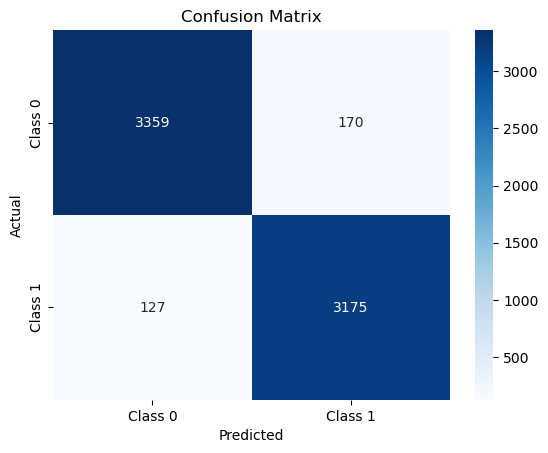

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_IDF, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### ROC curve & AUC

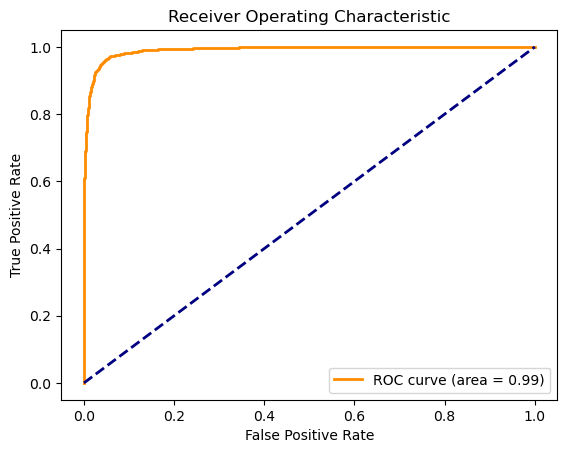

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = clf_svm.decision_function(X_test_IDF)
fpr, tpr, _ = roc_curve(y_test_IDF, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Precision-Recall Curve

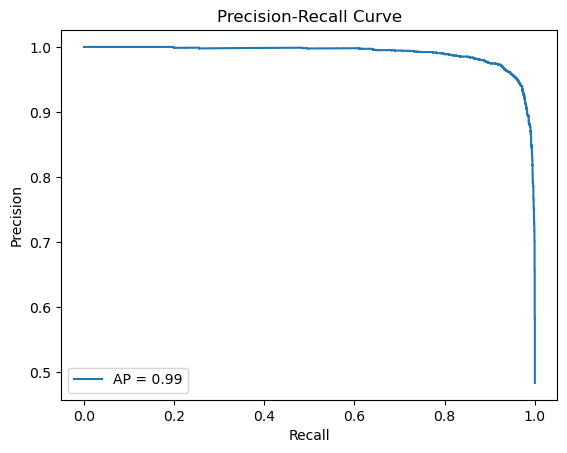

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test_IDF, y_pred_proba)
avg_precision = average_precision_score(y_test_IDF, y_pred_proba)

plt.step(recall, precision, where='post', label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_svm, X_test_IDF, y_test_IDF, cv=20, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


Cross-validation scores: [0.90935673 0.92982456 0.93567251 0.92690058 0.9502924  0.90935673
 0.94444444 0.94152047 0.92982456 0.92690058 0.93567251 0.91202346
 0.92375367 0.96480938 0.92961877 0.94428152 0.93841642 0.93841642
 0.93255132 0.95014663]
Mean accuracy: 0.93 ± 0.01
